<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Sale Price Prediction Model

> Authors: Djuwita Carney

---

## Objective
To make a prediction of housing price in Ames, Iowa as a function of many aspects of housing conditions

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
cd \Users\carne\Documents\Djuwita_DSI\Submissions\project_2

C:\Users\carne\Documents\Djuwita_DSI\Submissions\project_2


## Read Data
The `train` dataset consists of comprehensive housing data in Ames Iowa 

In [3]:
cd/djuwita/submissions/Project_2

[WinError 3] The system cannot find the path specified: '/djuwita/submissions/Project_2'
C:\Users\carne\Documents\Djuwita_DSI\Submissions\project_2


In [4]:
# Read in the train data in the data folder in this repository.
train = pd.read_csv('./datasets/train.csv')

## Explore the data
Use this space to familiarize yourself with the data.

Convince yourself there are no issues with the data. If you find any issues, clean them here.

In [5]:
# see if there are missing data and how many

train.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       330
Lot Area             0
Street               0
Alley             1911
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Mas Vnr Area        22
Exter Qual           0
Exter Cond           0
                  ... 
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area

In [6]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [7]:
# Drop columns with too many missing data

train.drop(['Pool QC','Fence','Misc Feature','Fireplace Qu','Alley','Lot Frontage'], inplace = True, axis = 1)

In [8]:
train.isnull().sum()

Id                  0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Area            0
Street              0
Lot Shape           0
Land Contour        0
Utilities           0
Lot Config          0
Land Slope          0
Neighborhood        0
Condition 1         0
Condition 2         0
Bldg Type           0
House Style         0
Overall Qual        0
Overall Cond        0
Year Built          0
Year Remod/Add      0
Roof Style          0
Roof Matl           0
Exterior 1st        0
Exterior 2nd        0
Mas Vnr Type       22
Mas Vnr Area       22
Exter Qual          0
Exter Cond          0
Foundation          0
Bsmt Qual          55
                 ... 
Gr Liv Area         0
Bsmt Full Bath      2
Bsmt Half Bath      2
Full Bath           0
Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
Kitchen Qual        0
TotRms AbvGrd       0
Functional          0
Fireplaces          0
Garage Type       113
Garage Yr Blt     114
Garage Finish     114
Garage Car

In [9]:
train['Neighborhood'].unique()

array(['Sawyer', 'SawyerW', 'NAmes', 'Timber', 'Edwards', 'OldTown',
       'BrDale', 'CollgCr', 'Somerst', 'Mitchel', 'StoneBr', 'NridgHt',
       'Gilbert', 'Crawfor', 'IDOTRR', 'NWAmes', 'Veenker', 'MeadowV',
       'SWISU', 'NoRidge', 'ClearCr', 'Blmngtn', 'BrkSide', 'NPkVill',
       'Blueste', 'GrnHill', 'Greens', 'Landmrk'], dtype=object)

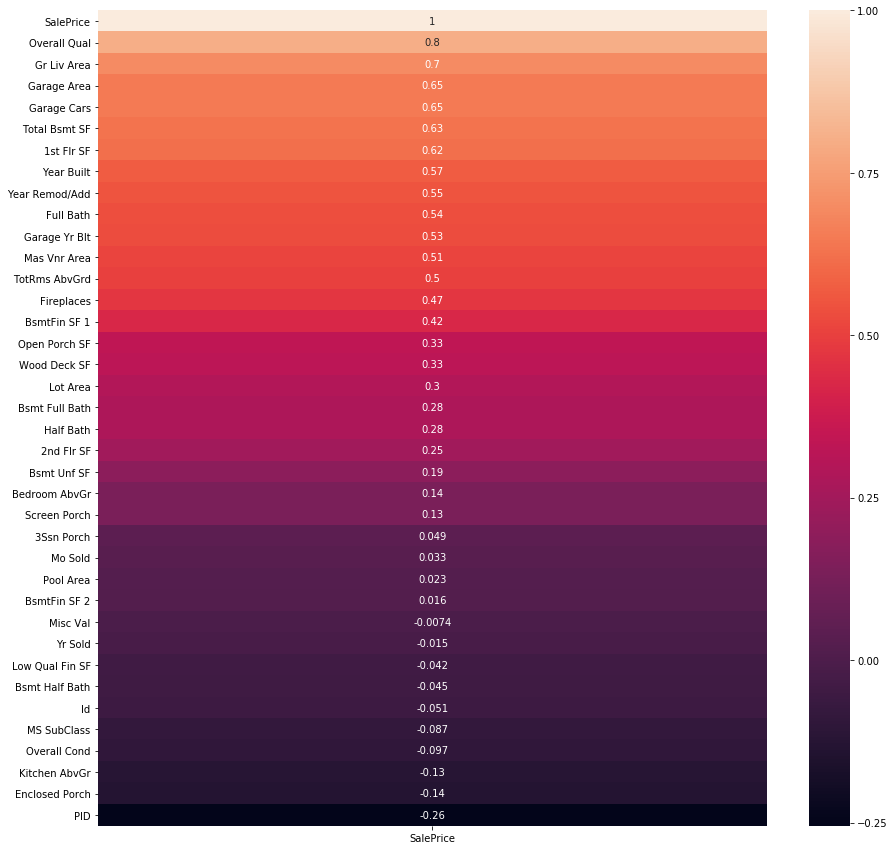

In [10]:
#Plot correlation coefficient between 'SalePrice' and prediction variables

plt.figure(figsize=(15,15))
sns.heatmap(train.corr()[['SalePrice']].sort_values(by = ['SalePrice'], ascending = False), annot=True )

In [11]:
# Use only variables with good correlation

train.drop(['3Ssn Porch','Mo Sold','Pool Area','BsmtFin SF 2', 'Misc Val','Yr Sold',
                    'Low Qual Fin SF','Bsmt Half Bath','Id','MS SubClass','Overall Cond',
                    'MS Zoning','Street','Roof Matl','Mas Vnr Area','Mas Vnr Type','BsmtFin Type 2','BsmtFin Type 2',
           'BsmtFin Type 2','Heating','Garage Cond','Garage Qual'], inplace = True, axis = 1)

In [12]:
train.columns

Index(['PID', 'Lot Area', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Exterior 1st', 'Exterior 2nd',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Heating QC', 'Central Air', 'Electrical',
       '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', 'Screen Porch', 'Sale Type', 'SalePrice'],
      dtype='object')

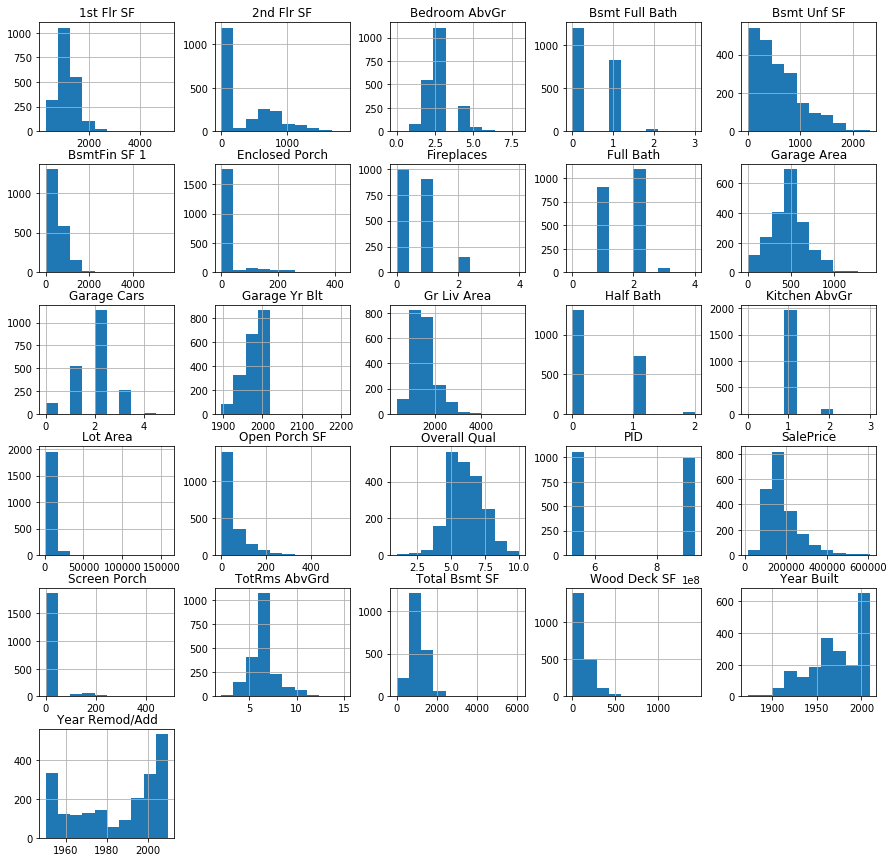

In [13]:
# Plot histograms for all numeric variables

train.hist(figsize=(15, 15));

In [14]:
neighboor_df = pd.DataFrame(train.groupby(['Neighborhood']).mean())

## Fill in missimg data with their median or mode, depending on the type of data and the amount of missing data

In [15]:
train['Bsmt Qual'].fillna('TA', inplace = True)

In [16]:
train['Bsmt Exposure'].fillna('No', inplace = True)

In [17]:
train['BsmtFin Type 1'].fillna('GLQ', inplace = True)

In [18]:
train['Garage Type'].fillna('Attchd', inplace = True)

In [19]:
train['Bsmt Unf SF'].fillna(train['Bsmt Unf SF'].median(), inplace = True)

In [20]:
train['Garage Yr Blt'].fillna(train['Garage Yr Blt'].median(), inplace = True)

In [21]:
train['Total Bsmt SF'].fillna(train['Total Bsmt SF'].median(), inplace = True)

In [22]:
train['Garage Finish'].fillna('Unf', inplace = True)

In [23]:
train['Bsmt Full Bath'].fillna(train['Bsmt Full Bath'].median(), inplace = True)

In [24]:
train['Garage Cars'].fillna(train['Garage Cars'].median(), inplace = True)

In [25]:
train['Garage Area'].fillna(train['Garage Area'].median(), inplace = True)

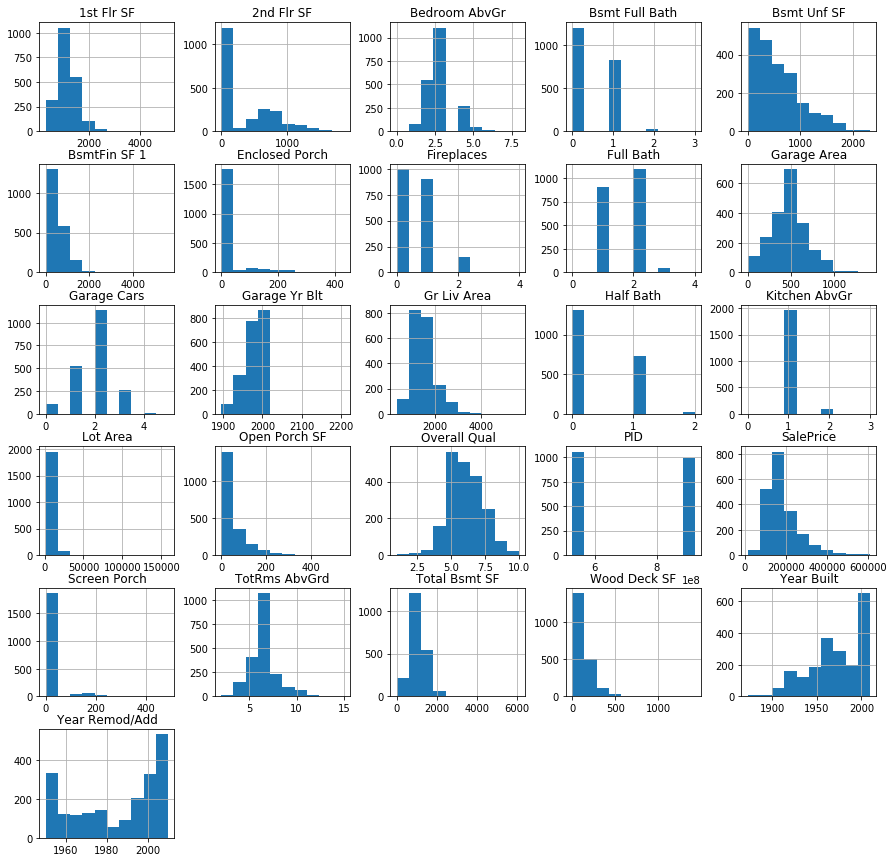

In [26]:
train.hist(figsize=(15, 15));

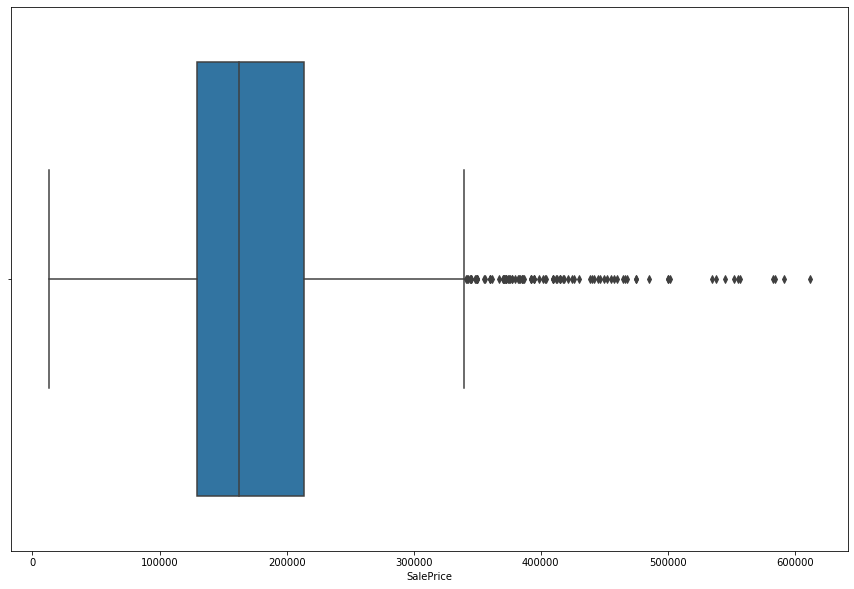

In [27]:
# Boxplot below illustrate the statistic of 'SalePrice'

plt.figure(figsize = (15,10))
sns.boxplot(train['SalePrice'])

In [28]:
# Read in the test data in the data folder in this repository.
test = pd.read_csv('./datasets/test.csv')

In [29]:
test.drop(['Lot Frontage', 'Alley','Pool QC', 'Fence','Misc Feature'], inplace =True, axis =1)

In [30]:
test.drop(['Fireplace Qu'], inplace =True, axis =1)

In [31]:
test['Mas Vnr Type'].fillna('None', inplace = True)

In [32]:
test['Mas Vnr Area'].fillna(0, inplace = True)

In [33]:
test['Bsmt Qual'].fillna('TA', inplace = True)

In [34]:
test['Bsmt Cond'].fillna('TA', inplace = True)

In [35]:
test['Bsmt Exposure'].fillna('No', inplace = True)

In [36]:
test['BsmtFin Type 1'].fillna('GLQ', inplace = True)

In [37]:
test['Garage Type'].fillna('Attchd', inplace = True)

In [38]:
test['Bsmt Unf SF'].fillna(train['Bsmt Unf SF'].median(), inplace = True)

In [39]:
test['Garage Yr Blt'].fillna(train['Garage Yr Blt'].median(), inplace = True)

In [40]:
test['Total Bsmt SF'].fillna(train['Total Bsmt SF'].median(), inplace = True)

In [41]:
test['Garage Finish'].fillna('Unf', inplace = True)

In [42]:
test['Garage Qual'].fillna('TA', inplace = True)

In [43]:
test['Garage Cond'].fillna('TA', inplace = True)

In [44]:
test['Bsmt Full Bath'].fillna(train['Bsmt Full Bath'].median(), inplace = True)

In [45]:
test['Garage Cars'].fillna(train['Garage Cars'].median(), inplace = True)

In [46]:
test['Garage Area'].fillna(train['Garage Area'].median(), inplace = True)

In [47]:
train.columns.difference(test.columns)

Index(['SalePrice'], dtype='object')

In [48]:
id_number = test['Id']
id_number = pd.DataFrame(id_number)
id_number.dropna()
id_number.shape

(879, 1)

In [49]:
test['Neighborhood'].unique()

array(['OldTown', 'Sawyer', 'Gilbert', 'NAmes', 'MeadowV', 'CollgCr',
       'Somerst', 'Mitchel', 'SawyerW', 'IDOTRR', 'BrkSide', 'Edwards',
       'ClearCr', 'NWAmes', 'Timber', 'NoRidge', 'NridgHt', 'Crawfor',
       'StoneBr', 'Veenker', 'BrDale', 'SWISU', 'Blmngtn', 'NPkVill',
       'Greens', 'Blueste'], dtype=object)

In [50]:
# Use only variables with good correlation

test.drop(['3Ssn Porch','Mo Sold','Pool Area','BsmtFin SF 2', 'Misc Val','Yr Sold',
                    'Low Qual Fin SF','Bsmt Half Bath','Id','MS SubClass','Overall Cond',
                    'MS Zoning','Street','Roof Matl','Mas Vnr Area','Mas Vnr Type','BsmtFin Type 2','BsmtFin Type 2',
           'BsmtFin Type 2','Heating','Garage Cond','Garage Qual'], inplace = True, axis = 1)

In [51]:
# Create dummies for train data
dummy_train = pd.get_dummies(train)
dummy_train = dummy_train.dropna()

In [52]:
# Create dummies for test data
test = pd.get_dummies(test)
test = test.dropna()
test.shape

(879, 206)

In [53]:
# Save clean data to csv file for regression analysis
dummy_train.to_csv(r'\Users\carne\Documents\Djuwita_DSI\Submissions\project_2\datasets\dummy_train.csv', index = False)
test.to_csv(r'\Users\carne\Documents\Djuwita_DSI\Submissions\project_2\datasets\clean_test.csv', index = False)
neighboor_df.to_csv(r'\Users\carne\Documents\Djuwita_DSI\Submissions\project_2\datasets\Neighbor.csv')